# Posttest 6

<pre>Nama  : Alif Maulana Setyawan
NIM   : 2109106002
Kelas : A1 Informatika 2021

Saya memilih Algoritma `K-Means Clustering` pada Unsupervised Learning dan telah saya tampilkan visualisasinya di akhir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Bank_Customer_Churn_Prediction.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Dataset tidak memiliki nilai `NULL`

In [3]:
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Dataset tidak memiliki nilai `Duplicate`

In [4]:
data.duplicated().sum()

0

# Subset & Standarisasi

In [5]:
# Melakukan pengelompokan dari customer bank berdasarkan nilai kredit dan saldo pada rekening

df_subset = data[['credit_score','balance']]
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

print(x_scaled)

[[-0.32622142 -1.22584767]
 [-0.44003595  0.11735002]
 [-1.53679418  1.33305335]
 ...
 [ 0.60498839 -1.22584767]
 [ 1.25683526 -0.02260751]
 [ 1.46377078  0.85996499]]


# K-Means Clustering

In [6]:
model_kmeans = KMeans(n_clusters = 3)

model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [7]:
labels = model_kmeans.labels_

In [8]:
print(labels)

[1 0 0 ... 1 2 2]


# Buat Cross_Tab untuk membandingkan antar Cluster

In [9]:
# Membuat dataframe dengan label dan Negara tempat tinggal sebagai kolom

df_kmeans = pd.DataFrame({'labels' : labels, 'negara' : data.country})

In [10]:
# Buat crosstab

crossTab = pd.crosstab(df_kmeans['labels'], df_kmeans['negara'])

In [11]:
print(crossTab)

negara  France  Germany  Spain
labels                        
0         1222     1223    614
1         2472       33   1223
2         1320     1253    640


In [12]:
plt.style.use('ggplot')

In [13]:
# Untuk mengambil semua baris pada kolom tertentu (berbentuk array)
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [14]:
# Menampung koordinat dari semua centroid
centroids = model_kmeans.cluster_centers_

In [15]:
# Memisahkan centroid koordinat x dan koordinat y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Visualisasi Centroid

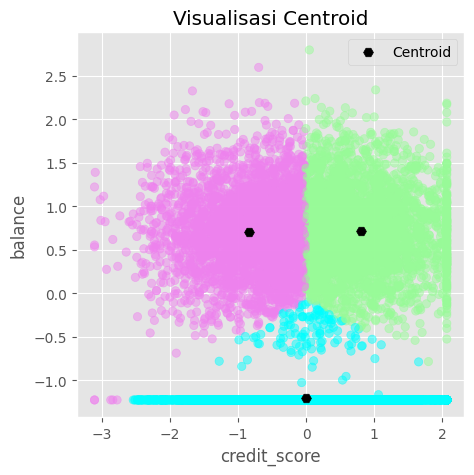

In [16]:
# Visualisasi Cluster
plt.figure(figsize=(5, 5))

colormap = np.array(['violet','cyan','palegreen'])

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha=0.5, c = colormap[labels])

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker="H", color = "black", s=50)

# Beri Label
plt.title("Visualisasi Centroid")
plt.xlabel("credit_score")
plt.ylabel("balance")

plt.legend()
plt.show()

# Visualisasi Tabel Aktual

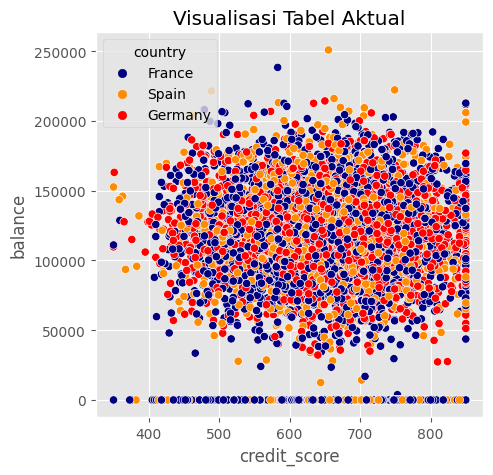

In [17]:
plt.figure(figsize=(5, 5))
df_aktual = data[["credit_score", "balance", "country"]]
sns.scatterplot(x = "credit_score", y = "balance", data = df_aktual, hue = "country",  palette=['navy','darkorange','red'])
plt.title("Visualisasi Tabel Aktual")
plt.show()